In [1]:
from pymongo import UpdateOne
from dotenv import load_dotenv
from Database import MongoDBConnection
import logging
import json
import os
import re

## connect to cloud MongoDB
try:
    connection = MongoDBConnection()
    collection = connection.get_collection('ramen_info')
except Exception as e:
    print(e)

with open("redo_list.json","r") as f:
    data = json.loads(f.read())


{'name': '姥夥房-新竹水田店',
 'maps_url': 'https://www.google.com.tw/maps/place/data=!4m8!3m7!1s0x3468350e2b9fd1db:0x4a0e9d3cbca87b00!8m2!3d24.8098769!4d120.9674499!9m1!1b1!16s%2Fg%2F11sv0st8pg?entry=ttu',
 'img_url': 'https://lh5.googleusercontent.com/p/AF1QipNplpzKKJwHq500clZnxkQnhd3in-_-bG6DMcfP=w408-h544-k-no',
 'img_base64': '',
 'open_time': {'星期二': ['11:30–20:30'],
  '星期三': ['11:30–20:30'],
  '星期四': ['11:30–20:30'],
  '星期五': ['11:30–20:30'],
  '星期六': ['11:30–20:30'],
  '星期日': ['11:30–20:30'],
  '星期一': ['11:30–20:30']},
 'website': 'http://lin.ee/zAvFo0C',
 'overall_rating': {'mean': '4.6',
  'amount_5': 98,
  'amount_4': 6,
  'amount_3': 7,
  'amount_2': 2,
  'amount_1': 4},
 'address': '新竹市北區北大路166巷1弄3號 ',
 'latitude': '24.8098769',
 'longitude': '120.9674499',
 'reviews': [{'user_id': '102984785681477691140',
   'user_url': 'https://www.google.com/maps/contrib/102984785681477691140/reviews?hl=zh-TW',
   'user_name': 'pinghsuan hung',
   'rating': '5',
   'comment': '台日合併的拉麵店\n\n至從在台北
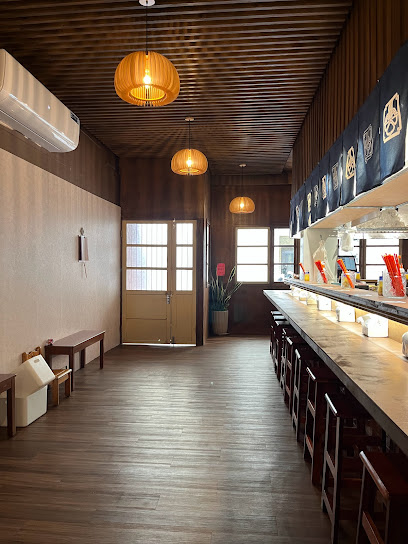

In [2]:
data[0]


In [3]:
no_address = list(collection.find({"address":{"$exists":False}}))


In [4]:
no_address[0]


{'_id': ObjectId('662f9f41ca2e19518759e579'),
 'name': '拉麵彼得',
 'location': {'type': 'Point', 'coordinates': [121.5544342, 25.0339662]},
 'maps_url': 'https://www.google.com.tw/maps/place/data=!3m1!4b1!4m6!3m5!1s0x3442ab4094aca979:0x481b3a5314a2b274!8m2!3d25.0339662!4d121.5544342!16s%2Fg%2F11l5zd234w?entry=ttu'}

In [5]:
no_address


[{'_id': ObjectId('662f9f41ca2e19518759e579'),
  'name': '拉麵彼得',
  'location': {'type': 'Point', 'coordinates': [121.5544342, 25.0339662]},
  'maps_url': 'https://www.google.com.tw/maps/place/data=!3m1!4b1!4m6!3m5!1s0x3442ab4094aca979:0x481b3a5314a2b274!8m2!3d25.0339662!4d121.5544342!16s%2Fg%2F11l5zd234w?entry=ttu'},
 {'_id': ObjectId('662f9f41ca2e19518759e5bc'),
  'name': 'RAMEN天神 - ',
  'location': {'type': 'Point', 'coordinates': [121.5434212, 25.0357342]},
  'maps_url': 'https://www.google.com.tw/maps/place/data=!4m6!3m5!1s0x3442abc64f9287fb:0xa5fd9bd16d97dae0!8m2!3d25.0357342!4d121.5434212!16s%2Fg%2F11vhy5vtnp?entry=ttu'},
 {'_id': ObjectId('662f9f41ca2e19518759e5c8'),
  'name': '四娘拉麵',
  'location': {'type': 'Point', 'coordinates': [121.0036958, 24.8271815]},
  'maps_url': 'https://www.google.com.tw/maps/place/data=!3m1!4b1!4m6!3m5!1s0x346837001c4a2529:0xd33bd4bb8b592d9e!8m2!3d24.8271815!4d121.0036958!16s%2Fg%2F11vk6_6k8m?entry=ttu'},
 {'_id': ObjectId('662f9f41ca2e19518759e5f2')

In [6]:
len(no_address)


98

In [7]:
cursor = collection.find({}, {"name": 1, "place_id": 1, "_id": 0})
for document in cursor:
    print(document.get("name"),"\t",document.get("place_id"))


麒麟創作拉麵坊 	 ChIJRYLOKvmpQjQRSrAwjEP7e9I
一幸拉麵中和店 | 新北美食 新北美食推薦 中和美食 中和美食推薦 附近美食 午餐 晚餐 餐廳 	 ChIJY2bhUC0DaDQRv7bbV1X7sHw
長生塩人 蘆洲 	 ChIJ44q7ZlepQjQRN-KxL88R00A
一風堂 板橋環球店 	 ChIJd4nIOA-pQjQRKC4-ehnxyew
森一男豚骨拉麵 	 None
鵲喜沾麵專門店 	 ChIJSUbBBus9aTQRCjHBlzZ5vyg
ピーター商店/らあ麺Pete/拉麵彼得 	 ChIJC80A4HqrQjQRtd3O1BQDARU
座位有限 Limited Seats 	 ChIJeamslECrQjQRdLKiFFM6G0g
麵屋時 	 ChIJ55hw1darQjQRQP6O_cHAh38
豚人拉麵 新店店 	 ChIJIYYAx74BaDQR3NdYXf5FeVU
雞白湯專門 拉麵一貴 らーめん一貴 	 ChIJE_YQX7OnQjQRwq6zUlF8Pv8
濃氣屋拉麵公館店 	 ChIJs0bGyuupQjQRJdGaMl53Syc
麵屋鴒 板橋 	 ChIJy_MLmGEDaDQRRCIgAeggpoI
十夜_海味拉麵 	 ChIJsfKttpM5aTQRGW6qvhYfM9c
雞湯桑 Torisan 中山雙連店 	 ChIJudPjhh6pQjQRCM54sCNOFmg
姥夥房-新竹水田店 	 ChIJ29GfKw41aDQRAHuovDydDko
火山湯海 	 ChIJ67CSCpgFbjQR3p-6-Ooy2bk
京楽町拉麵-板橋新海店 	 ChIJXaSmRQKpQjQRZMmwNR6oV0k
塩琉 	 ChIJe5kqTsWpQjQRuLUxkeZMJ84
実正拉麵(實正拉麵) 	 ChIJ98cOCUKrQjQRBb_2yk6dpgo
宋囍拉麵 らーめん 	 ChIJfeeGYQCpQjQR3APy8hkBGX0
小高拉麵 板橋中山店 	 ChIJ0dHkZFipQjQROFHWJ3lj_hA
麵屋武藏 光復店 	 ChIJrTD86ZurQjQRltD43-NNGZA
青山製麵所 	 ChIJFzhJKRBTXTQRkvs7XH-zwPk
麵屋雞金 延吉店 	 ChIJgQ7QqL6rQ

In [8]:
from_DB = collection.find({}, {"name": 1, "place_id": 1, "_id": 0})


In [9]:
from_DB = list(collection.find({}, {"name": 1, "place_id": 1, "_id": 0}))


In [10]:

from_DB


[{'name': '麒麟創作拉麵坊', 'place_id': 'ChIJRYLOKvmpQjQRSrAwjEP7e9I'},
 {'name': '一幸拉麵中和店 | 新北美食 新北美食推薦 中和美食 中和美食推薦 附近美食 午餐 晚餐 餐廳',
  'place_id': 'ChIJY2bhUC0DaDQRv7bbV1X7sHw'},
 {'name': '長生塩人 蘆洲', 'place_id': 'ChIJ44q7ZlepQjQRN-KxL88R00A'},
 {'name': '一風堂 板橋環球店', 'place_id': 'ChIJd4nIOA-pQjQRKC4-ehnxyew'},
 {'name': '森一男豚骨拉麵'},
 {'name': '鵲喜沾麵專門店', 'place_id': 'ChIJSUbBBus9aTQRCjHBlzZ5vyg'},
 {'name': 'ピーター商店/らあ麺Pete/拉麵彼得', 'place_id': 'ChIJC80A4HqrQjQRtd3O1BQDARU'},
 {'name': '座位有限 Limited Seats', 'place_id': 'ChIJeamslECrQjQRdLKiFFM6G0g'},
 {'name': '麵屋時', 'place_id': 'ChIJ55hw1darQjQRQP6O_cHAh38'},
 {'name': '豚人拉麵 新店店', 'place_id': 'ChIJIYYAx74BaDQR3NdYXf5FeVU'},
 {'name': '雞白湯專門 拉麵一貴 らーめん一貴', 'place_id': 'ChIJE_YQX7OnQjQRwq6zUlF8Pv8'},
 {'name': '濃氣屋拉麵公館店', 'place_id': 'ChIJs0bGyuupQjQRJdGaMl53Syc'},
 {'name': '麵屋鴒 板橋', 'place_id': 'ChIJy_MLmGEDaDQRRCIgAeggpoI'},
 {'name': '十夜_海味拉麵', 'place_id': 'ChIJsfKttpM5aTQRGW6qvhYfM9c'},
 {'name': '雞湯桑 Torisan 中山雙連店', 'place_id': 'ChIJudPjhh6pQjQ

In [11]:
import pandas as pd


In [12]:
df_DB = pd.DataFrame(from_DB)


In [13]:
with open("correction_list.json","r") as f:
    correction_list = json.load(f)
correction_list = [{"alias":d["alias"],"name":d["name"]} for d in correction_list]


In [14]:
df_alias = pd.DataFrame(correction_list)


In [15]:
with open("ramen_tags.json","r") as f:
    ramen_tags = json.load(f)

processed = []
for item in ramen_tags:
    alias = re.sub(r'\((\d+|\w)*(開幕|預定|試賣|未定|試營運|預計)*\)|\((\w|\d+)*停\w*業*\)','', item["名稱"])
    features=[]
    if "湯頭" in item:
        features.extend(item["湯頭"].split("、"))
    if "醬底種類" in item:
        features.extend(item["醬底種類"].split("、"))
    if "系統" in item:
        features.extend(item["系統"].split("、"))
    all_values = ' '.join(item.values())
    if re.match(r'.*沾麵.*', all_values):
        features.append('沾麵')
    
    noodle = []
    if "自家製麵、麵類、特色" in item:
        noodle = re.findall(r'麵類:(.*?)、', item["自家製麵、麵類、特色"])
    processed.append({"alias": alias, "features": list(set(features)), "noodle": noodle})

df_features = pd.DataFrame(processed)


In [16]:
df_alias.head()


,alias,name
0,麒麟創作拉麵,麒麟創作拉麵坊
1,一幸拉麵 - 中和店,一幸拉麵中和店 | 新北美食 新北美食推薦 中和美食 中和美食推薦 附近美食 午餐 晚餐 餐廳
2,長生塩人 - 蘆洲店,長生塩人 蘆洲
3,一風堂-板橋環球店,一風堂 板橋環球店
4,古流拉麵 - 台南店,森一男豚骨拉麵


In [17]:
df_features.head()


,alias,features,noodle
0,麒麟創作拉麵,[雞魚介],[]
1,一幸拉麵 - 中和店,"[雞白湯, 濃厚系]",[]
2,長生塩人 - 蘆洲店,[],[]
3,一風堂-板橋環球店,[],[]
4,森一男豚骨拉麵,"[豚骨湯, 濃厚系]",[]


In [21]:
pd.set_option('display.max_rows', None)


In [28]:
from collections import Counter
multiple = []
for key,value in Counter(df_alias.name).items():
    if value>1:
        multiple.append(key)

In [29]:
multiple

['Kitaho 北穗製麵所',
 '森本家拉麵',
 '鳥哲 燒物專門店',
 '豚人拉麵 復興店',
 '一風堂台北101店',
 'Le Ming 麵食精釀餐酒館—林口店',
 '大石家拉麵',
 '三友拉麵(民生店)',
 '埔里橫濱拉麵',
 '火影忍者 - 一樂拉麵 新竹湳雅店']

In [34]:
df_alias[df_alias.name.isin(multiple)].sort_values("name")

,alias,name
6,道樂製麵所-豚骨專賣店,Kitaho 北穗製麵所
645,Kitaho 北穗製麵所,Kitaho 北穗製麵所
498,合之屋(新北／三重),Le Ming 麵食精釀餐酒館—林口店
497,Le Ming 麵食精釀餐酒館-林口店(新北／林口),Le Ming 麵食精釀餐酒館—林口店
499,食雞《雞肉飯｜拉麵》(桃園／楊梅),Le Ming 麵食精釀餐酒館—林口店
500,幸運草廚房(新竹／東區),Le Ming 麵食精釀餐酒館—林口店
470,一風堂-台北101店(北市／信義),一風堂台北101店
471,一風堂-微風台北車站店(北市／中正),一風堂台北101店
516,三友拉麵-土城店(新北／土城),三友拉麵(民生店)
514,三友拉麵-民生店(北市／松山),三友拉麵(民生店)


In [44]:
to_remove = df_alias[df_alias.name.isin(multiple)].index
to_stay = [645,497,470,516,541,511,56,451,626,120]
to_remove[to_remove.isin(to_stay)==False]

Index([  6,  45, 452, 471, 496, 498, 499, 500, 514, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 599, 621],
      dtype='int64')

In [46]:
to_remove = to_remove[to_remove.isin(to_stay)==False]

In [52]:
to_remove = to_remove.tolist()

In [56]:
df_alias = df_alias.drop(to_remove)

In [67]:
df_DB.drop_duplicates(inplace=True)
df_detail = df_alias.merge(df_features,how="outer").merge(df_DB,how="outer")

In [84]:
df_detail.head()

,alias,name,features,noodle,place_id
0,11番町豚骨拉麵-桃園長庚店,11番町豚骨拉麵,[],[],NaN
1,23私房麵(新北／三重),23私房拉麵(不對外開放僅供社群熟客預約),[],[],ChIJwbIty8upQjQRsgZPw1qiptE
2,25弄居間(台南／東區),25弄居間,"[辣味, 醬油, 豚骨湯, 塩味, 濃厚系]",[],ChIJOWxmxzV3bjQRW5aqNhxnLAw
3,CHILL RAMEN,CHILL RAMEN,"[豚濃湯, 味噌, 豚白湯, 辣味, 醬油, 濃厚系, 豚魚介, 塩味, 淡麗系, 豚清湯]",[中細麵],ChIJw-k1L7WvQjQRP3nnx45wnRw
4,La’麺Knock Out,Concept La’麺KnockOut總本店/拉麺店/鶏白湯拉麺/蝦拉麺/魚介拉麺/泰国系...,"[雞魚介, 魚介湯, 蛤蠣, 塩味, 蝦味, 濃厚系]",[],NaN


In [89]:
ramen_paired_similarity = pd.read_csv("recommendation/ramen_paired_similarity.csv",index_col=0)

In [99]:
df_merged = pd.merge(ramen_paired_similarity, df_DB, left_on=['place_id1'], right_on=['place_id'], how='inner').merge(df_DB, left_on=['place_id2'], right_on=['place_id'], how='inner')

In [102]:
similar_places = df_merged[['name_x','name_y']].groupby('name_x')['name_y'].apply(list).reset_index()

In [107]:
df_detail = df_detail.merge(similar_places,left_on=['name'], right_on=['name_x'],how="left").drop(columns='name_x')
df_detail = df_detail.rename(columns={'name_y':'top_similar'})


In [109]:
df_detail.head()

,alias,name,features,noodle,place_id,top_similar
0,11番町豚骨拉麵-桃園長庚店,11番町豚骨拉麵,[],[],NaN,NaN
1,23私房麵(新北／三重),23私房拉麵(不對外開放僅供社群熟客預約),[],[],ChIJwbIty8upQjQRsgZPw1qiptE,"[辰拉麵, 創作拉麵 悠然, 信川屋博多豚骨拉麵店/台中美食/台中餐廳/台中拉麵/台中必吃,..."
2,25弄居間(台南／東區),25弄居間,"[辣味, 醬油, 豚骨湯, 塩味, 濃厚系]",[],ChIJOWxmxzV3bjQRW5aqNhxnLAw,"[淺草 咖哩蛋包, 麵太郎居酒屋, 均晣溫度, 合之屋, 鷺足拉麵]"
3,CHILL RAMEN,CHILL RAMEN,"[豚濃湯, 味噌, 豚白湯, 辣味, 醬油, 濃厚系, 豚魚介, 塩味, 淡麗系, 豚清湯]",[中細麵],ChIJw-k1L7WvQjQRP3nnx45wnRw,"[麵屋武藏-神山, 神山拉麵, 許諺屋｜日式拉麵、御膳（無訂位服務）, 初 拉麵&煎餃, 初..."
4,La’麺Knock Out,Concept La’麺KnockOut總本店/拉麺店/鶏白湯拉麺/蝦拉麺/魚介拉麺/泰国系...,"[雞魚介, 魚介湯, 蛤蠣, 塩味, 蝦味, 濃厚系]",[],NaN,NaN


In [108]:
all = len(df_detail)
NaN_ = len(df_detail[df_detail.name.isnull()])

print(f"all = {all}")
print(f"NaN = {NaN_}")
print(f"wait_to_upsert = {all - NaN_}")

all = 1018
NaN = 249
wait_to_upsert = 769


In [118]:
documents = df_detail[df_detail.name.notnull()].to_dict(orient='records')

In [119]:
len(documents)

769

In [121]:
df_detail[(df_detail.place_id.isnull()) & (df_detail.top_similar.notnull())]

,alias,name,features,noodle,place_id,top_similar


In [151]:
for ramen in documents:
    if not isinstance(ramen['top_similar'],list):
        print(ramen['top_similar'])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [153]:
from datetime import datetime
import pytz

operations = []
for ramen in documents:
    query = {"name": ramen["name"]}
    update = {
        "$set": {
            "name": ramen["name"],
            "alias": ramen["alias"],
            "features": ramen["features"],
            "noodle": ramen["noodle"],
            "top_similar": ramen["top_similar"] if isinstance(ramen['top_similar'],list) else [],
            "update_time": datetime.now(pytz.utc)
        }
    }
    operation = UpdateOne(query, update, upsert=True)
    operations.append(operation)

operations[:10]

[UpdateOne({'name': '11番町豚骨拉麵'}, {'$set': {'name': '11番町豚骨拉麵', 'alias': '11番町豚骨拉麵-桃園長庚店', 'features': [], 'noodle': [], 'top_similar': [], 'update_time': datetime.datetime(2024, 4, 30, 8, 6, 2, 917546, tzinfo=<UTC>)}}, True, None, None, None),
 UpdateOne({'name': '23私房拉麵(不對外開放僅供社群熟客預約)'}, {'$set': {'name': '23私房拉麵(不對外開放僅供社群熟客預約)', 'alias': '23私房麵(新北／三重)', 'features': [], 'noodle': [], 'top_similar': ['辰拉麵', '創作拉麵 悠然', '信川屋博多豚骨拉麵店/台中美食/台中餐廳/台中拉麵/台中必吃', '墨玖拉麵(公休日請見臉書專頁）', 'あお．実家和食処'], 'update_time': datetime.datetime(2024, 4, 30, 8, 6, 2, 917666, tzinfo=<UTC>)}}, True, None, None, None),
 UpdateOne({'name': '25弄居間'}, {'$set': {'name': '25弄居間', 'alias': '25弄居間(台南／東區)', 'features': ['辣味', '醬油', '豚骨湯', '塩味', '濃厚系'], 'noodle': [], 'top_similar': ['淺草 咖哩蛋包', '麵太郎居酒屋', '均晣溫度', '合之屋', '鷺足拉麵'], 'update_time': datetime.datetime(2024, 4, 30, 8, 6, 2, 917675, tzinfo=<UTC>)}}, True, None, None, None),
 UpdateOne({'name': 'CHILL RAMEN'}, {'$set': {'name': 'CHILL RAMEN', 'alias': 'CHILL RAMEN', 'featu

In [154]:
logging.basicConfig(level=logging.INFO,filename='log_update_ramen.txt',filemode='a',
    format='%(asctime)s %(filename)s %(levelname)s:%(message)s')

try:
    if operations:
        result = collection.bulk_write(operations, ordered=False)
        logging.info(f"Ramen data updated successfully: {result.bulk_api_result}")
        print(f"Ramen data updated successfully: {result.bulk_api_result}")
    else:
        logging.info("No Ramen data to update.")
        print("No Ramen data to update.")
except Exception as e:
    logging.error(f"Error during Ramen data bulk update: {e}")
    print(e)

Ramen data updated successfully: {'writeErrors': [], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 1, 'nMatched': 768, 'nModified': 768, 'nRemoved': 0, 'upserted': [{'index': 43, '_id': ObjectId('6630a696ca2e195187d0ad06')}]}
